In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
df = pd.read_csv("../input/new-york-city-taxi-fare-prediction/train.csv",nrows=1000000)
df_test= pd.read_csv("../input/new-york-city-taxi-fare-prediction/test.csv")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [4]:
df = df.dropna(how = 'any', axis = 'rows')
df_test = df_test.dropna(how = 'any', axis = 'rows')

In [5]:
df.shape

(999990, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999990 non-null  object 
 1   fare_amount        999990 non-null  float64
 2   pickup_datetime    999990 non-null  object 
 3   pickup_longitude   999990 non-null  float64
 4   pickup_latitude    999990 non-null  float64
 5   dropoff_longitude  999990 non-null  float64
 6   dropoff_latitude   999990 non-null  float64
 7   passenger_count    999990 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [8]:
df['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [9]:
df = df.drop(df[df['fare_amount']<0].index, axis=0)


In [10]:
df['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [11]:
df = df.drop(df[df['passenger_count']>6].index, axis=0)
df_test = df_test.drop(df_test[df_test['passenger_count']>6].index, axis=0)

In [12]:
df.shape

(999951, 8)

In [13]:
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

df_test['key'] = pd.to_datetime(df['key'])
df_test['pickup_datetime']  = pd.to_datetime(df_test['pickup_datetime'])

In [14]:
data = [df,df_test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [15]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


Text(0, 0.5, 'Frequency')

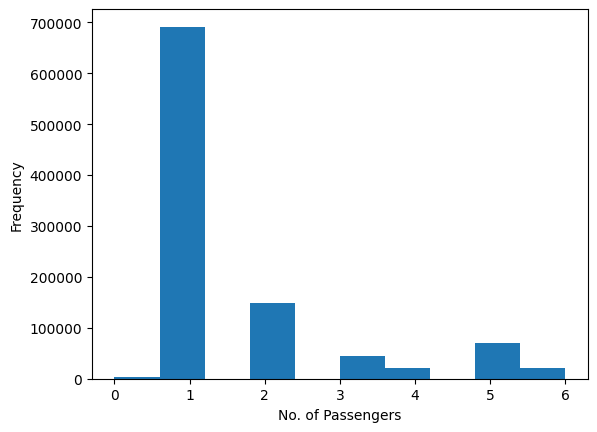

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['passenger_count'])
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

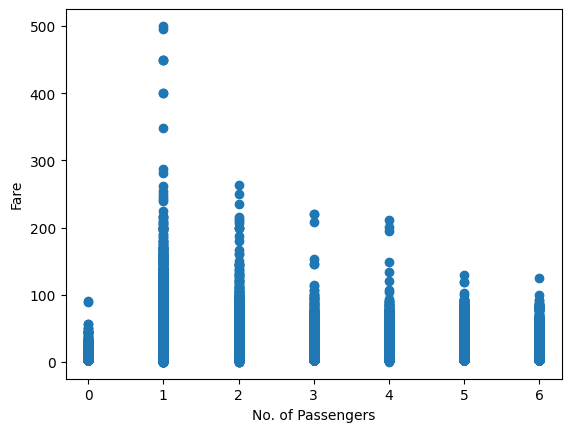

In [17]:
plt.figure()
plt.scatter(x=df['passenger_count'], y=df['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

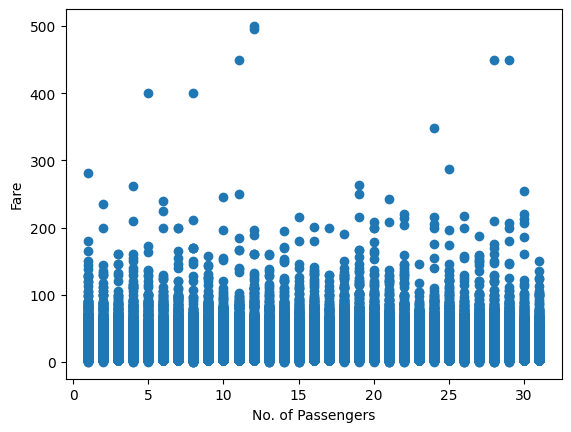

In [18]:
plt.figure()
plt.scatter(x=df['Date'], y=df['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

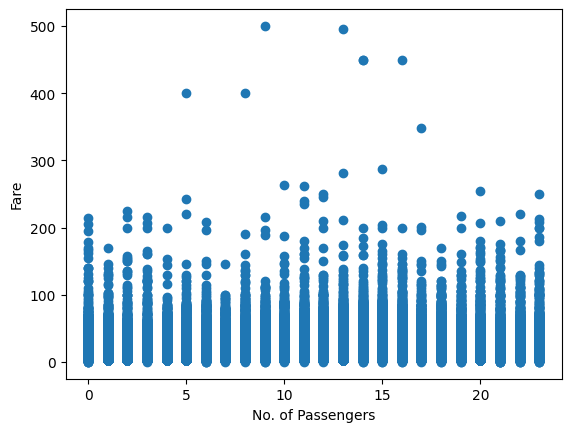

In [19]:
plt.figure()
plt.scatter(x=df['Hour'], y=df['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

In [20]:
df1 = pd.DataFrame(df, columns=['Hour', 'fare_amount'])
df1.groupby('Hour').mean()

,fare_amount
Hour,
0,11.741448
1,11.448878
2,11.487458
3,12.032729
4,13.569086
5,15.398358
6,12.210433
7,10.959879
8,10.904826


Text(0, 0.5, 'Frequency')

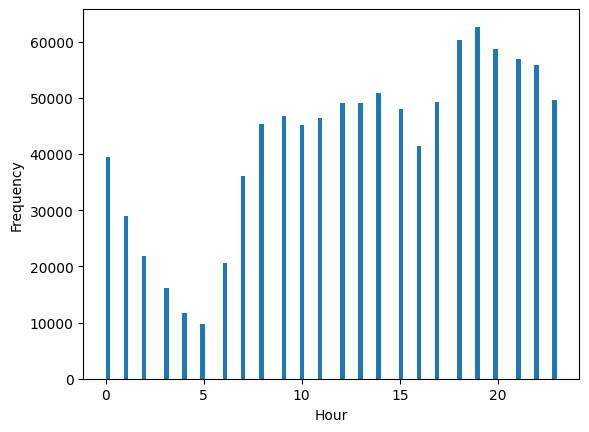

In [21]:
plt.figure()
plt.hist(df['Hour'],bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

MODEL

In [22]:
x_train = df.iloc[:,df.columns!='fare_amount']
y_train = df['fare_amount'].values
x_test = df_test

In [23]:
x_train.shape

(999951, 12)

In [24]:
x_train = x_train.drop(['key','pickup_datetime'], axis = 1)
x_test = x_test.drop(['key','pickup_datetime'], axis = 1)

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999951 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   999951 non-null  float64
 1   pickup_latitude    999951 non-null  float64
 2   dropoff_longitude  999951 non-null  float64
 3   dropoff_latitude   999951 non-null  float64
 4   passenger_count    999951 non-null  int64  
 5   Year               999951 non-null  int32  
 6   Month              999951 non-null  int32  
 7   Date               999951 non-null  int32  
 8   Day of Week        999951 non-null  int32  
 9   Hour               999951 non-null  int32  
dtypes: float64(4), int32(5), int64(1)
memory usage: 97.1 MB


In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

reg_pred = reg.predict(x_test)

In [27]:
submission = pd.read_csv('../input/new-york-city-taxi-fare-prediction/sample_submission.csv')
submission['fare_amount'] = reg_pred
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,12.811444
1,2015-01-27 13:08:24.0000003,12.811393
2,2011-10-08 11:53:44.0000002,11.261512
3,2012-12-01 21:12:12.0000002,11.805614
4,2012-12-01 21:12:12.0000003,11.805647
5,2012-12-01 21:12:12.0000005,11.805734
6,2011-10-06 12:10:20.0000001,11.228208
7,2011-10-06 12:10:20.0000003,11.228482
8,2011-10-06 12:10:20.0000002,11.228081
9,2014-02-18 15:22:20.0000002,12.197159


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)